<h1><center><strong><font color="chillipepper">Lab 1: Pengenalan tentang Data Teks</font></strong></center></h1>
<h3><center><font color="blue"><strong>Untuk Mahasiswa Kelas NLP - FTI UKSW</strong></font></center></h3>

<center>
2024
</center>

------------------------

# Pengantar

Kalian harus kerjakan semua yang ada tulisan **TODO** pastikan memahami soal yang diberikan dan perhatikan kisi-kisi atau **hint** yang diberikan.

## Yang dibutuhkan

- Python
- Pandas

## Sumber-sumber bacaan:

- NLTK: https://www.nltk.org/api/nltk.tokenize.html
- PANDAS: https://pandas.pydata.org/docs/getting_started/index.html
- SPACY: https://spacy.io/usage/spacy-101

## Database yang digunakan:

Kita gunakan 2 dataset, yaitu:
1. [Dataset dari BBC News]. Sudah disediakan sebuah corpus yang bisa kita langsung gunakan.
2. [Dataset dari Amazon Review]. Ini corpus dalam beberapa bahasa yang nantinya kita akan ambil dari library-nya langsung (https://huggingface.co/datasets).

## Yang harus dilakukan (**TUGAS**)

### 1. Preprocessing dasar.
- Buka database (dataset). Buat deskripsi singkat dari data tersebut ( statistik tentang artikelnya). Berapa banyak data unik yang ada? Berapa rata-rata panjang data dari artikel tersebut?

- Tampilkan berapa banyak anotasi dari tiap artikel tersebut. Cek apakah anotasinya konsisten?

### 2. Word-level preprocessing
- Bagi (split) data ke dalam list kata. Seberapa berbedakah kata-kata tersebut?

- Bagi (split) artikel ke dalam list kata dengan menggunakan 3 tokenizers yang berbeda dari **nltk**. Apa perbedaannya? Menurut kalian apa yang berubah?

# <font color="chillipepper">**Imports dan Install** 📂</font>

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip3 install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 62.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 44.4 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357942 sha256=b5ecd9b36cf8bcf3feab2e8c740d81b1a67459d96b6e938355056df5f8d93f3f
  Stored in directory: /tmp/pip-ephem-wheel-cache-k97116em/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htm

In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored

<ipython-input-2-9d89c47a7176>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# <font color="chillipepper">**Unduh/Download Data** 💾</font>

In [ ]:
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/bbc-news-data.zip
! unzip bbc-news-data.zip

--2024-03-25 07:34:05--  https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/bbc-news-data.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1896286 (1.8M) [application/octet-stream]
Saving to: ‘bbc-news-data.zip’

bbc-news-data.zip   100%[===================>]   1.81M  --.-KB/s    in 0.07s   

2024-03-25 07:34:05 (24.1 MB/s) - ‘bbc-news-data.zip’ saved [1896286/1896286]

Archive:  bbc-news-data.zip
  inflating: bbc-news-data.csv       


# <font color="chillipepper">**Dasar Eksplorasi Data** 📊</font>

Pertama, kita harus buat database di python, gunakan **Pandas dataframe**.

Kalau mau baca lengkap baca di sini ya:
- https://pandas.pydata.org/docs/

In [ ]:
df = pd.read_csv('./bbc-news-data.csv', sep='\t')
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (2225, 4)


,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


Dataframe kita punya kolom-kolom berikut:

In [ ]:
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

### 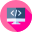 **TODO!** Cek berapa banyak data yang berbeda/unik di dataset kita!

Tips/Hint: Kalian butuh fungsi `.unique()`

In [ ]:
# banyaknya perbedaan/keunikan dalam dataset
print(len(df.filename.unique()))

511


### 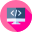 **TODO!** Cetak rata-rata (*contoh* jumlah karakter) dalam kolom `konten`

Tip/Hint: Kalian butuh fungsi `.mean()`

In [ ]:
# rata-rata
df.content.drop_duplicates().apply(len).mean()

2232.1692160611856

### 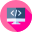 **TODO!** tampilkan kategori artikel!

In [ ]:
# tampilkan kategori artikel
df.category.drop_duplicates().tolist()

['business', 'entertainment', 'politics', 'sport', 'tech']

### 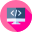 **TODO!** Tampilkan panjang konten (karakter) dengan histogram.

Tip/Hint: Gunakan fungsi `.hist()`

<Axes: >

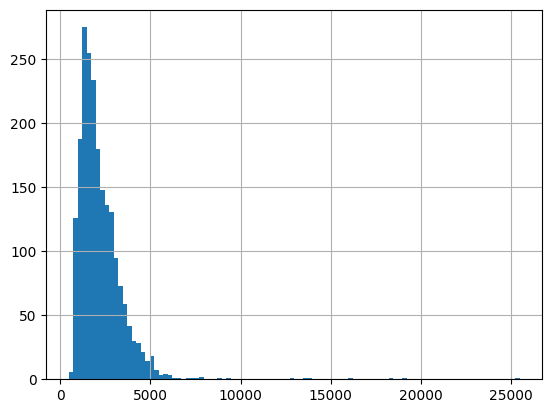

In [ ]:
# tampilkan dalam histogram panjang konten
%matplotlib inline
df.content.drop_duplicates().apply(len).hist(bins=100)

### 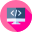 **TODO!** Tampilkan banyaknya data per `category`.

Tip/Hint: Kamu butuh fungsi `.groupby()`

In [ ]:
# cek banyaknya artikel per kategori
df.drop_duplicates().groupby(df.category).size()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
dtype: int64

### 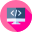 **TODO!** Tampilin dalam bentuk histogram banyaknya artikel per kategori.

<Axes: >

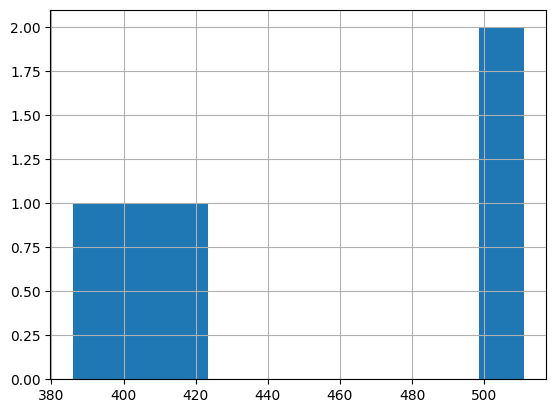

In [ ]:
# tampilin histogram-nya
df.drop_duplicates().groupby(df.category).size().hist()

### 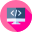 **TODO!** Let's add some basic information about the text: number of "words". Put them into new `title_len` and `content_len` columns.
Yuk tambahkan beberapa informasi dalam kolom `title_len` dan kolom `content_len`.

Tip/Hint: Bagi (split) teks berdasarkan spasi. Kamu pasti butuh fungsi `apply()`

In [ ]:
# Gunakan cara berikut
df['content_len'] = df["content"].apply(lambda s: len(s.split()))
df['title_len'] = df["title"].apply(lambda s: len(s.split()))

In [ ]:
# tampilkan dataframe yang sudah ada dua tambahan kolom baru
df

,category,filename,title,content,content_len,title_len
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415,6
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379,5
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258,6
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400,6
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260,5
...,...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,414,6
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,352,5
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...,1045,5
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,374,5


Sekarang kita tinggal tampilkan PandasProfiling dengan fungsi `ProfileReport()`

Eksplorrrr ya, biar hasilnya asyik!

In [ ]:
# buat report otomatis dan interaktif dengan dataset BBC News
profile = ProfileReport(df, title="BBC News", html={"style": {"full_width": True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 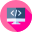 **TODO!** Tampilkan standar deviasi dari masing-masing kolom `title_len` dan `content_len`.

Tip/Hint: Kalian butuh fungsi `.std()`

In [ ]:
eval_cols = ["title_len", 'content_len']
# tulis kodingmu di sini

,title_len,content_len
filename,,
001.txt,0.836660,199.297015
002.txt,0.547723,108.580845
003.txt,1.000000,138.855320
004.txt,1.224745,121.730029
005.txt,0.000000,274.165461
...,...,...
507.txt,0.707107,164.755880
508.txt,0.707107,63.639610
509.txt,0.000000,160.513239


### 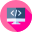 **TODO!** Lengkapi koding berikut dengan koding sebelumnya. Ini untuk menampilkan plot dari distribusi standar deviasi dari `title_len` dan `content_len`.

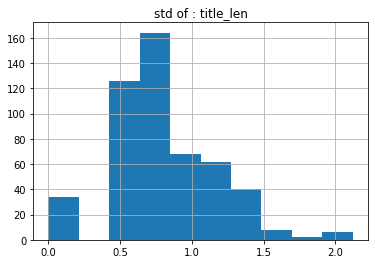

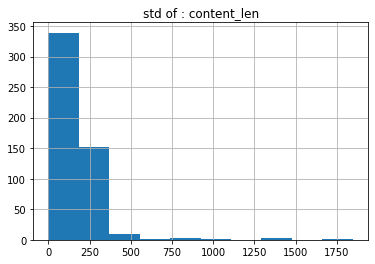

In [ ]:
import matplotlib.pyplot as plt

for col in eval_cols:
  plt.figure()
  plt.title("std of : {0}".format(col))
  # tulissss kodingmu....
  plt.plot()

# <font color="chillipepper">**Preprocessing**</font>

### 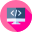 **TODO!** Bagi dataset (split). Lihat berapa perbedaan yang ada dalam kalimat?

In [ ]:
# Banyaknya data dengan pemisah dalam "konten" = " "
arr = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array

# sekarang jadikan satu level list.
# masukkan ke dalam satu set
arr = [ x for X in arr for x in X]

# lalu dapatkan banyaknya kata
print(arr[:5])
print('%s "kata" dalam konten' % (len(set(arr)) ) )

['', 'Quarterly', 'profits', 'at', 'US']
64779 "kata" dalam konten


In [ ]:
# lakukan hal yang sama untuk "judul"

['Ad', 'sales', 'boost', 'Time', 'Warner']
4475 "words" in the titles


### 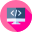 **TODO!** Bagi (split) konten ke dalam list dengan 3 tokenizers berbeda dari nltk. Apa perbedaannya? Apa yang berubah?

In [ ]:
# https://www.nltk.org/api/nltk.tokenize.html
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
import pdb # python debugger
for tok in tqdm(tokenizers):
  print('Pakai tokenizer: %s' % (tok))
  arr = df.content.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  arr = [ x for X in arr for x in X]

  print('Ambil 30 token pertama: %s' % (arr[:30]) )
  print("Ukuran vokab: {0} dengan {1} tokenizer".format(len(set(arr)), tok))
  print('='*5)

  0%|          | 0/3 [00:00<?, ?it/s]

Pakai tokenizer: <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7a2acf6dded0>
Ambil 30 token pertama: ['Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', '£600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier.', 'The', 'firm', ',']
Ukuran vokab: 45705 dengan <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7a2acf6dded0> tokenizer
=====
Pakai tokenizer: <nltk.tokenize.toktok.ToktokTokenizer object at 0x7a2acd1a74c0>
Ambil 30 token pertama: ['Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', '£', '600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier.', 'The', 'firm']
Ukuran vokab: 45298 dengan <nltk.tokenize.toktok.ToktokTokenizer object at 0x7a2acd1a74c0> tokenizer
=====
Pakai tokenizer: <nltk.tokenize.casual.TweetTokenizer object at 0x7a2acd1

Kalau kita lihat untuk 30 token pertama, `TweetTokenizer` adalah satu-satunya untuk memisahkan "bn" dari "1.13" dalam "1.13bn".

### 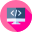 **TODO!** Cek apakah hukum Zipf sudah berhasil diimplementasikan?

Lengkapi koding berikut ya...

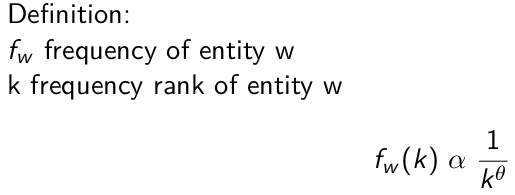

  0%|          | 0/3 [00:00<?, ?it/s]

Counter({'the': 41922, ',': 33355, 'to': 23016, 'of': 18551, 'and': 16858, 'a': 16227, 'in': 15506, '``': 10518, "''": 8756, "'s": 8327, 'is': 8040, 'for': 7949, 'The': 7494, 'that': 7278, 'on': 6681, 'was': 5755, 'said': 5475, 'be': 5359, 'it': 5203, 'with': 4766, 'has': 4674, 'have': 4495, 'as': 4330, 'at': 4112, 'will': 4104, 'he': 4097, 'by': 4066, 'are': 4062, 'I': 3694, '.': 3547, 'not': 3342, 'from': 3242, '-': 3009, 'Mr': 2796, 'his': 2687, 'an': 2544, 'but': 2507, 'would': 2458, 'had': 2447, 'which': 2407, 'been': 2346, 'they': 2323, 'their': 2203, ')': 2114, '(': 2112, 'were': 2066, 'this': 2055, 'its': 2045, 'more': 1987, 'also': 1955, 'It': 1939, 'who': 1935, '%': 1837, 'we': 1790, 'up': 1739, 'people': 1691, 'But': 1690, 'about': 1639, ':': 1568, 'can': 1558, 'than': 1499, 'He': 1499, 'or': 1498, 'after': 1488, 'could': 1431, 'out': 1391, 'one': 1356, 'new': 1353, 'said.': 1328, 'US': 1311, 'year': 1290, 'all': 1234, 'over': 1215, 'do': 1201, 'you': 1177, 'there': 1171, 'l

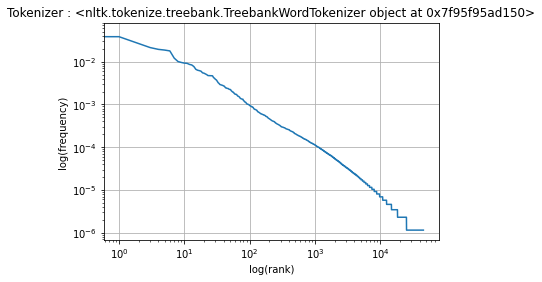

Counter({'the': 41925, ',': 33355, 'to': 23014, '"': 19265, 'of': 18551, 'and': 16858, 'a': 16234, 'in': 15505, "'": 12332, 's': 8329, 'is': 7982, 'for': 7947, 'The': 7496, 'that': 7279, 'on': 6681, 'was': 5693, 'said': 5392, 'be': 5361, 'it': 5200, 'with': 4766, 'has': 4656, 'have': 4451, 'as': 4330, 'at': 4112, 'will': 4105, 'he': 4097, 'by': 4067, 'are': 4042, 'I': 3714, 'from': 3241, 'not': 3182, '-': 3009, 'Mr': 2796, 'his': 2687, 'an': 2545, 'but': 2507, 'had': 2440, 'which': 2407, 'would': 2407, 'been': 2346, 'they': 2323, 'their': 2203, ')': 2114, '(': 2110, '.': 2061, 'this': 2055, 'were': 2050, 'its': 2045, 'more': 1985, 'also': 1955, 'It': 1940, 'who': 1936, '%': 1837, 'we': 1791, 'up': 1740, 'people': 1691, 'But': 1690, 'about': 1639, ':': 1596, 'can': 1523, 'He': 1500, 'than': 1499, 'or': 1499, 'after': 1487, 'said.': 1411, 'could': 1397, 'out': 1389, 'one': 1357, 'new': 1354, '£': 1305, 'US': 1297, 'year': 1267, 'all': 1235, 'over': 1215, 'you': 1181, 'there': 1169, 'last

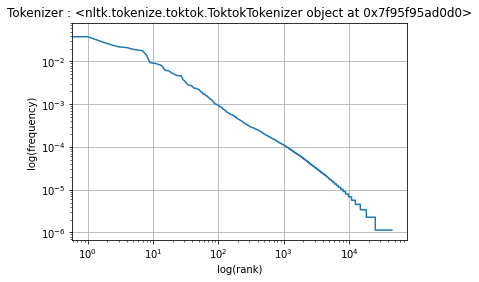

Counter({'the': 41925, '.': 38402, ',': 33363, 'to': 23041, '"': 19265, 'of': 18557, 'and': 16869, 'a': 16233, 'in': 15552, 'is': 8017, 'for': 7973, 'The': 7500, 'that': 7247, 'said': 6803, 'on': 6739, 'was': 5701, 'be': 5389, 'it': 5058, 'with': 4789, 'has': 4658, 'have': 4456, 'as': 4330, 'at': 4116, 'will': 4115, 'by': 4071, 'are': 4055, 'he': 3999, '-': 3616, 'from': 3250, 'not': 3209, 'I': 3096, 'Mr': 2806, 'his': 2691, 'an': 2545, 'but': 2507, 'had': 2448, 'would': 2410, 'which': 2408, 'been': 2348, 'they': 2250, 'their': 2203, 'this': 2100, '(': 2095, ')': 2076, 'were': 2058, 'its': 2045, 'more': 2015, 'also': 1956, 'who': 1930, '%': 1837, 'up': 1794, 'people': 1691, 'But': 1690, 'about': 1654, 'we': 1629, ':': 1563, "'": 1541, 'It': 1521, 'or': 1508, 'than': 1499, 'after': 1489, 'year': 1487, 'out': 1472, 'He': 1454, 'can': 1410, 'could': 1398, 'one': 1393, 'US': 1379, 'new': 1358, '£': 1306, 'all': 1269, 'over': 1249, 'last': 1165, 'there': 1162, 'first': 1156, '$': 1148, 'you

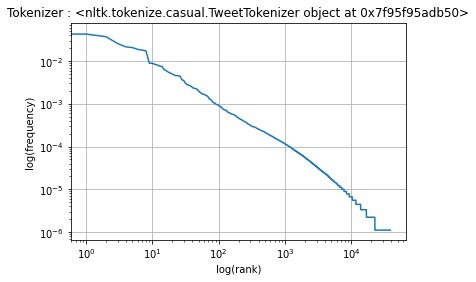

In [ ]:
# Impor ini memungkinkan kita untuk hitung kemunculan setiap elemen berbeda dalam list/daftar
from collections import Counter
import matplotlib.pyplot as plt


for tok in tqdm(tokenizers):
  # hitung jumlah per kata
  # contoh penggunaan: a = [1, 1, 2, 5, 6, 5]; print(Counter(a))

  # lanjutkan koding untuk plot
  # lakukan format objek penghitung ke kumpulan data (counter) yang tepat
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # hitung frekuensi
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # urutkan berdasarkan frekuensi, kata yang paling sering muncul di bagian atas df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # pakai skala log
  plt.yscale('log')  # pakai skala log
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

# <h2 id="(c)">(c)</h2>
<p>Copyright &copy; 2024 <b>Evangs Mailoa</b>.</p>

---


<p>Digunakan khusus untuk ngajar NLP di Progdi Teknik Informatika - FTI UKSW</p>